# Corneal OCT quantification 
## For "Haze" detection: librairies and plot functions

In [1]:
from src.image_OCT import *
from src.image_Quantification import *
from src.image_Quantification_2 import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
import os
from os import listdir
from os.path import isfile, join
import re
import pandas as pd
import math 
import seaborn as sns
from sklearn import datasets, svm

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
%matplotlib inline
# plt.figure
# plt.savefig(os.path.join(savefold, 'coucou'+extension))

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


In [2]:
def plot_treatment(im):
	plt.figure()
	plt.subplot(221)
	plt.title("Input image")
	plt.imshow(im.OCT_brut,cmap="gray")
	plt.axis("off")
	plt.subplot(222)
	plt.title("Arrow removal")
	plt.imshow(im.OCT,cmap="gray")
	plt.axis("off")
	plt.subplot(223)
	plt.title("Exposure correction")
	plt.imshow(im.OCT_cut,cmap="gray")
	plt.axis("off")
	plt.subplot(224)
	plt.title("Flattening")
	plt.imshow(im.OCT_flat,cmap="gray")
	plt.axis("off")
	# plt.show()

def plot_profile(im,im_Q):
	plt.figure()
	res=im_Q.res
	peak=res[0];xmin=res[1];xmax=res[2];xlow1=res[3];xlow2=res[4];extractedProf=res[5]	
	plt.subplot(211)
	plt.imshow(im.OCT_flat.transpose(),cmap="gray",aspect="auto")
	plt.axis("off")
	plt.subplot(212)
	plt.plot(im_Q.intentityProfile)
	plt.xlim([0,im_Q.intentityProfile.shape[0]])
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	# plt.show()

def plot_quantification(im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")
	# plt.show()

def plot_extracted(im,im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")

def im_plot(im,type='OCT_brut'):
	plt.figure()
	if type=='OCT_brut':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT_cut':
		plt.imshow(im.OCT_cut,cmap="gray",aspect="auto")
	elif type=='OCT_flat':
		plt.imshow(im.OCT_flat,cmap="gray",aspect="auto")
	else:
		print("Type not recognize")


## Example of profile extraction and fitting

Line


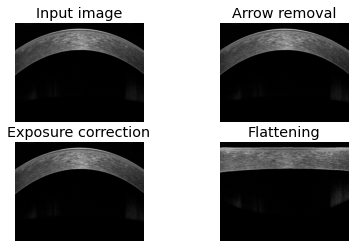

In [29]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 3.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
# filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy_2','NASRAM_OD_Cross.jpg')
# filepathname=os.path.join(dirname, 'Data','Fuchs_2','BRIMIC_OD_9_Line.jpg')
filepathname=os.path.join(dirname, 'Data','Healthy','80608_REZAZK_OS.jpg')

im=image_OCT(filepathname)
print(im.Path_eye)
im.AutoTreatment()
plot_treatment(im)
moving=False

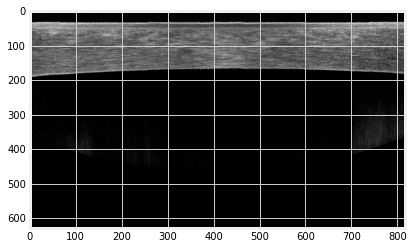

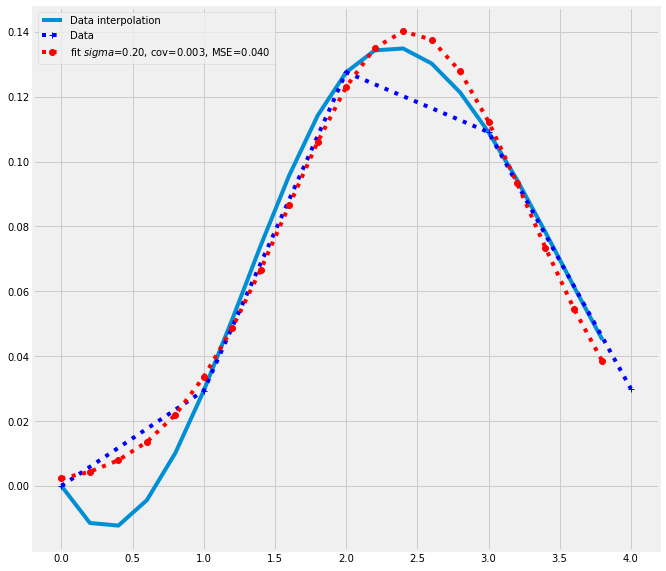

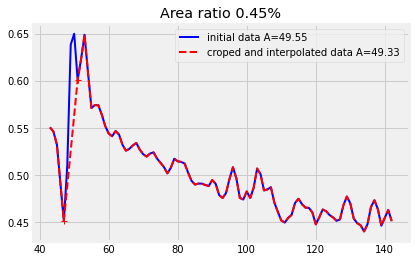

Under bowman: True
{'PeakWidth': 0.9231479344564966, 'Sigma': 0.195858326704558, 'DataCov': 0.0025333310526694706, 'Mean': 0.561852971308165, 'MSE': 0.04029968446705035, 'AreaRatio': 0.004459405705050611, 'FibrosisUnderBowman': True}


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

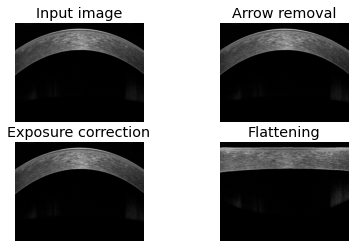

<Figure size 432x288 with 0 Axes>

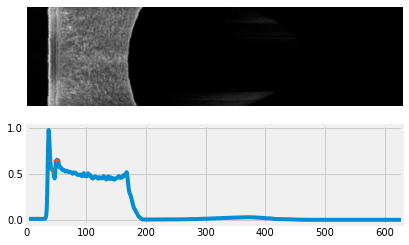

<Figure size 432x288 with 0 Axes>

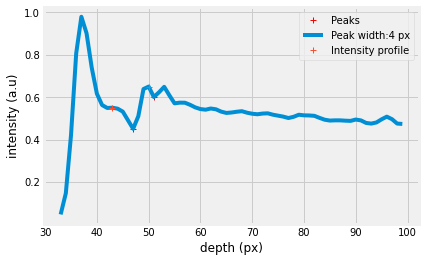

In [30]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
# filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')

im=image_OCT(filepathname)
im.AutoTreatment()
im_plot(im,type='OCT_flat')
moving=False
intensity_corr=True

plt.figure(figsize=(10,10))
# im_Q=image_Quantification(im,plot=True,moving=moving,intensity_corr=intensity_corr)
im_Q=image_Quantification_2(im,plot=True,intensity_corr=intensity_corr)
print("Under bowman:",im_Q.underBowman)
if not moving:
	plt.savefig(savefold+"profile"+extension)

	plt.figure(figsize=(10,10))
	plot_treatment(im)
	plt.savefig(savefold+"profile1"+extension)

	plt.figure()
	plot_profile(im,im_Q)
	plt.savefig(savefold+"profile2"+extension)

	plt.figure()
	plot_quantification(im_Q)
	plt.savefig(savefold+"profile3"+extension)
else:
    print(im_Q.parameters)
# plt.imshow(im.OCT_flat)
# filepathname="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/HAZE/haze 1.jpg"
# im=image_OCT(filepathname)
# im.AutoTreatment()
# im_Q=image_Quantification(im,plot=True)
# plot_profile(im,im_Q.res)
# plt.imshow(im.OCT_flat)
print(im_Q.parameters)

## Multi-image treatment
### Dataset extraction

In [5]:
moving=False

In [6]:
repertory_haze=os.path.join(dirname, 'Data','HAZE')
repertory_healthy=os.path.join(dirname, 'Data','Healthy')

files_haze = [f for f in listdir(repertory_haze) if isfile(join(repertory_haze, f))]
files_healthy = [f for f in listdir(repertory_healthy) if isfile(join(repertory_healthy, f))]

quantification=[]
i=0
i_list_haze=[]
for haze in files_haze:
	i+=1
	im=image_OCT(os.path.join(repertory_haze, haze))
	try:
		im.AutoTreatment()
		im_Q=image_Quantification_2(im,plot=False,intensity_corr=intensity_corr)
		# im_Q=image_Quantification(im,plot=False,moving=moving,intensity_corr=intensity_corr)
		parameters=im_Q.parameters
		parameters["Healthy"]=0
		parameters["Origin"]=haze[:-4]
		quantification.append(parameters)
		print(i,":",haze)
		i_list_haze.append(i)
	except:
		print("Error with: "+haze+" image #"+str(i))

i=0
i_list_healthy=[]
for healthy in files_healthy:
	i+=1
	im=image_OCT(os.path.join(repertory_healthy, healthy))
	try:
		im.AutoTreatment()
		im_Q=image_Quantification_2(im,plot=False,intensity_corr=intensity_corr)
		# im_Q=image_Quantification(im,plot=False,moving=moving,intensity_corr=intensity_corr)
		parameters=im_Q.parameters
		parameters["Healthy"]=1
		parameters["Origin"]=healthy[:-4]
		quantification.append(parameters)
		print(i,":",healthy)
		i_list_healthy.append(i)
	except:
		print("Error with: "+healthy+" image #"+str(i))

n=len(quantification)
data=pd.DataFrame(quantification,index=range(n)) 
data.to_pickle("./Dataset/data_set_learning_small_2.pkl")

1 : haze 1.jpg
2 : haze 2.jpg
3 : haze 3.jpg
4 : haze 4.jpg
5 : haze 5.jpg
Error with: haze 6.jpg image #6
1 : 23923_BOULIS_OD.jpg
2 : 79296_BESNIC_OD.jpg
3 : 80552_CORANT_OD.jpg
4 : 80552_CORANT_OS.jpg
5 : 80553_DUMFAU_OD.jpg
6 : 80553_DUMFAU_OS.jpg
7 : 80608_REZAZK_OD.jpg
8 : 80608_REZAZK_OS.jpg
9 : 81225_GOLDIM_OD.jpg
10 : 81225_GOLDIM_OS.jpg
11 : 81232_VILMAE_OD.jpg
12 : 81232_VILMAE_OS.jpg


### Result of quantification and variables correlation

In [7]:
data


,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,FibrosisUnderBowman,Healthy,Origin
0,1.846296,0.380289,0.005340,0.978498,0.060113,0.025228,False,0,haze 1
1,1.850995,0.393882,0.006932,0.873084,0.071712,0.035414,False,0,haze 2
2,2.769444,0.473048,0.008245,1.395871,0.101507,0.032512,False,0,haze 3
3,1.846296,0.392768,0.003314,0.964355,0.057010,0.013868,False,0,haze 4
4,2.313744,0.452605,0.003376,1.181390,0.055239,0.026566,False,0,haze 5
5,1.384722,0.246538,0.002342,0.639839,0.018596,0.014643,False,1,23923_BOULIS_OD
6,0.923148,0.198192,0.003769,0.509474,0.027947,0.006992,False,1,79296_BESNIC_OD
7,0.923148,0.213466,0.003672,0.506200,0.026316,0.005714,False,1,80552_CORANT_OD
8,0.923148,0.206011,0.003118,0.444885,0.022910,0.007326,False,1,80552_CORANT_OS
9,0.923148,0.199322,0.001858,0.379350,0.028643,0.007672,False,1,80553_DUMFAU_OD


<AxesSubplot:>

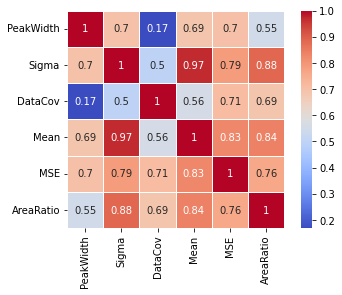

In [8]:
data_copy=data.drop(["Healthy","Origin","FibrosisUnderBowman"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
cor=data_copy.corr()
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True )

### Plot two by two

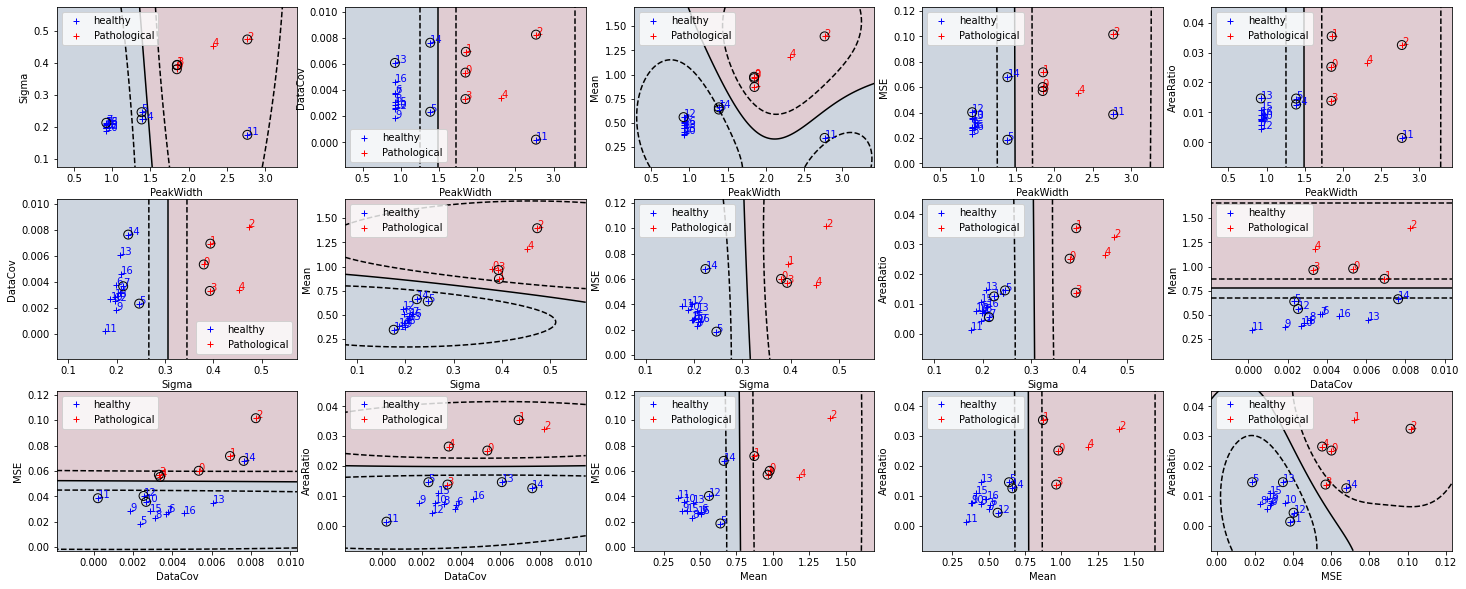

In [9]:
#Plot two by two
import warnings
warnings.filterwarnings("ignore")

variable=data_copy.columns
k=len(variable)
comb=math.comb(k,2)
	
plt.figure(figsize=(25,10))
nline=3
ncol=comb//nline+int(comb/nline-comb//nline+0.5)
l=0
for i in range(k-1):
    for j in range(i+1,k):
        l+=1
        plt.subplot(nline,ncol,l)
        x_class1=data[variable[i]][data["Healthy"]==1]
        y_class1=data[variable[j]][data["Healthy"]==1]
        x_class0=data[variable[i]][data["Healthy"]==0]
        y_class0=data[variable[j]][data["Healthy"]==0]
        plt.plot(x_class1.T,y_class1.T,"b+",label="healthy")
        plt.plot(x_class0.T,y_class0.T,"r+",label="Pathological")
        for m in range(len(data)):
            if data["Healthy"][m]==1:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="blue")
            else:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="red")
        X=data[variable[i]]
        Y=data[variable[j]]
        Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
        C=np.array([data["Healthy"].to_numpy()]).T
        clf = svm.SVC()
        clf.fit(Z, C)
        x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
        x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
        y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
        y_max = Z[:, 1].max()+1*np.std(Z[:, 1])
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
        plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
        plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=0.1)
        plt.xlabel(variable[i])
        plt.ylabel(variable[j])
        plt.legend()
        

### Exemple of treatment

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\HAZE\haze 5.jpg


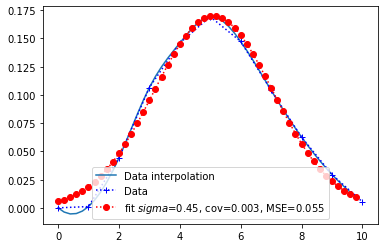

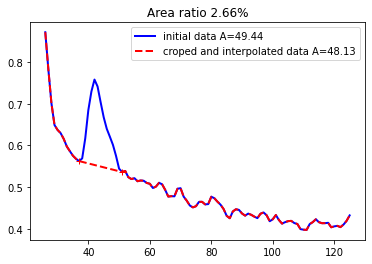

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\Healthy\80553_DUMFAU_OD.jpg


<Figure size 432x288 with 0 Axes>

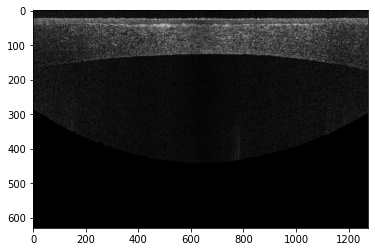

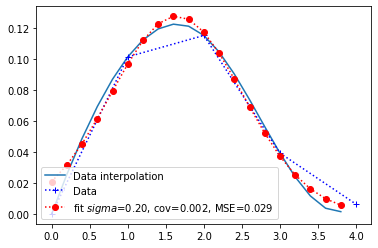

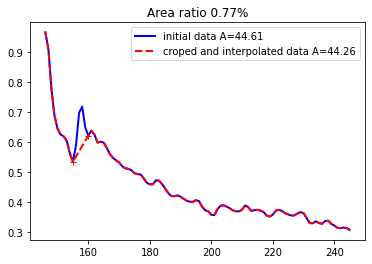

<Figure size 432x288 with 0 Axes>

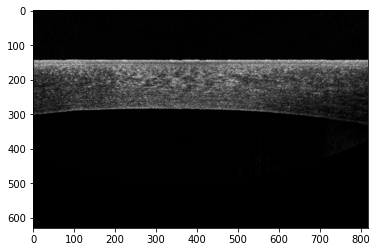

In [10]:
i=4
im=image_OCT(os.path.join(repertory_haze, files_haze[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification_2(im,True,intensity_corr=intensity_corr)
plt.figure();im_plot(im,type='OCT_flat')
# plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')

plt.figure()
i=4
im=image_OCT(os.path.join(repertory_healthy, files_healthy[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification_2(im,True,intensity_corr=intensity_corr)
plt.figure();im_plot(im,type='OCT_flat')
# plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')

## SVM classifier
### On PCA axis

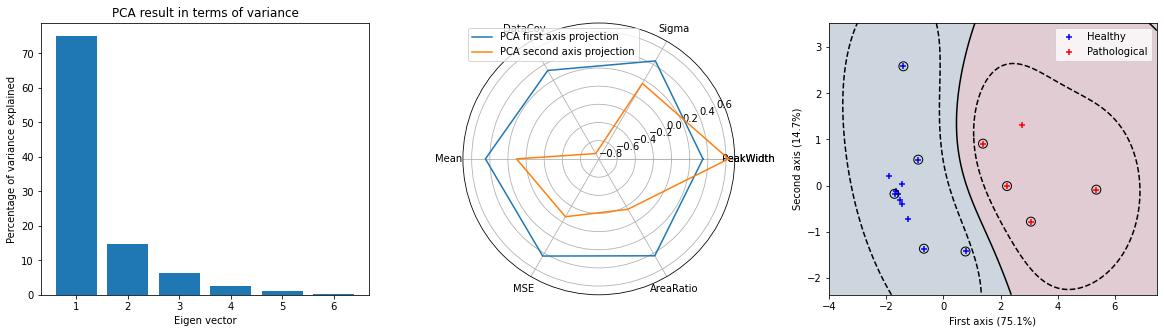

In [11]:
# PCA
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn import svm

data_copy=data.drop(["Healthy","Origin","FibrosisUnderBowman"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
N=len(data_copy)
K=len(data_copy.columns)
pca = PCA()
pca.fit(data_copy)


plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(np.arange(1,K+1,1),pca.explained_variance_ratio_*100)
plt.xlabel('Eigen vector')
plt.ylabel('Percentage of variance explained')
plt.title("PCA result in terms of variance")
plt.subplot(132,polar=True)
categories = data_copy.columns
categories = [*categories, categories[0]]
axis1= pca.components_[0]
axis1 = [*axis1, axis1[0]]
axis2= pca.components_[1]
axis2 = [*axis2, axis2[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(axis1))
plt.plot(label_loc, axis1, label='PCA first axis projection')
plt.plot(label_loc, axis2, label='PCA second axis projection')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()

X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T
clf = svm.SVC()
clf.fit(Z, C)
x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
y_max = Z[:, 1].max()+1*np.std(Z[:, 1])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.subplot(133)
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()

pca = PCA(n_components=2)
data_proj=pca.fit(data_copy,data["Healthy"])

### Leave one out test

In [12]:
#SVM LOO test

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T

loo = LeaveOneOut()
loo.get_n_splits(Z)
result=[]
result_pred=[]
conf=np.zeros((2,2))
for train_index, test_index in loo.split(X):
	print("TRAIN:", train_index, "TEST:", test_index)
	X_train, X_test = Z[train_index], Z[test_index]
	y_train, y_test = C[train_index], C[test_index]
	clf = svm.SVC()
	clf.fit(X_train, y_train)
	y_predict=clf.predict(X_test)
	result.append(y_test.ravel()[0])
	result_pred.append(y_predict.ravel()[0])
	if y_predict[0]==y_test[0][0] and y_test[0][0]==0:
		conf[0,0]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==1:
		print(y_predict,y_test)
		conf[0,1]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==0:
		conf[1,0]+=1
	elif y_predict[0]==y_test[0][0] and y_test[0][0]==1:
		conf[1,1]+=1
# print(result_pred)
# print(result)
# print(result_pred==result)
# ytrain=data["Healthy"].to_numpy()
print(conf)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16] TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16] TEST: [13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16] T

## Random Forest

In [13]:
#RF LOO test
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 2020)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
rf.fit(data_copy, data["Healthy"])
predictions = rf.predict(data_copy)
# confusion_matrix(predictions, data["Healthy"])
predictions=(predictions+0.5).astype(int)
ytrain=data["Healthy"].to_numpy()

print(confusion_matrix(predictions,ytrain))
print(predictions)
print(ytrain)


[[ 5  0]
 [ 0 12]]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 0, 'Relative Importance')

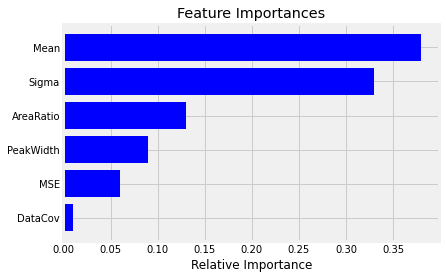

In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [data_copy.columns[i] for i in indices])
plt.xlabel('Relative Importance')

## New healthy dataset

In [15]:
repertory_healthy_2=os.path.join(dirname, 'Data','Healthy_2')
healthy_value=1 #healthy

def create_new_dataset(repository,healthy_value):
	files = [f for f in listdir(repository) if isfile(join(repository, f))]
	quantification=[]
	i=0
	i_list=[]
	for f in files:
		if(f[-3:]=="jpg"):
			i+=1
			try:
				im=image_OCT(os.path.join(repository, f))
			except:
				print("Error with: "+f+" image #"+str(i))
			try:
				im.AutoTreatment()
				# im_Q=image_Quantification(im,plot=False,moving=moving,intensity_corr=intensity_corr)
				im_Q=image_Quantification_2(im,plot=False,intensity_corr=intensity_corr)
				parameters=im_Q.parameters
				parameters["Healthy"]=healthy_value
				parameters["Origin"]=f[:-4]
				quantification.append(parameters)
				# print(i,":",healthy)
				i_list.append(i)
			except:
				print("Error with: "+f+" image #"+str(i))
	n=len(quantification)
	print(n,"/",len(files)," files succesfully quantified")
	data=pd.DataFrame(quantification,index=range(n)) 
	return(data)

data_2=create_new_dataset(repertory_healthy_2,healthy_value)
data_2.to_pickle("./Dataset/data_set_healthy_2.pkl")

Error with: ESTNAN_OD_Line.jpg image #47
Error with: GIRCHA_OD_Cross.jpg image #59
Error with: GRESUZ_OS_Line.jpg image #67
Error with: NASRAM_OD_PachyWide.jpg image #132
162 / 166  files succesfully quantified


In [16]:
data_2

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,FibrosisUnderBowman,Healthy,Origin
0,0.923148,0.192947,0.010370,0.486650,0.038216,0.010086,False,1,ARAILI_OS_Line
1,0.923148,0.215471,0.003818,0.521991,0.027520,0.006718,False,1,ARAILI_OS_Pachy
2,0.923148,0.196984,0.004940,0.415865,0.038276,0.011333,False,1,BEGABD_OD_Cross
3,0.923148,0.190614,0.006197,0.435204,0.031705,0.009720,False,1,BEGABD_OD_Pachy
4,0.923148,0.197016,0.006339,0.422160,0.037819,0.010149,False,1,BEGABD_OS_Cross
...,...,...,...,...,...,...,...,...,...
157,0.923148,0.202665,0.003875,0.547548,0.035856,0.006904,False,1,TOUMAT_OS_Pachy
158,0.923148,0.188890,0.000977,0.417909,0.014408,0.004512,True,1,WIETIP_OD_Line
159,0.923148,0.194796,0.002739,0.495813,0.020844,0.007157,True,1,WIETIP_OD_Pachy
160,0.923148,0.194756,0.002725,0.414720,0.029858,0.007072,False,1,WIETIP_OS_Line


(162, 6) 6
Ratio of true positive: 93.83%
Miss classified:10
Missclassify: ELHNAC_OD_Pachy
Missclassify: GAYSTE_OD_PachyWide
Missclassify: GAYSTE_OS_PachyWide
Missclassify: LADFED_OD_Pachy
Missclassify: LAMKEV_OD_PachyWide
Missclassify: LAMKEV_OS_PachyWide
Missclassify: PORALE_OS_PachyWide
Missclassify: SLOJUL_OS_PachyWide
Missclassify: TESJUL_OD_Pachy
Missclassify: TESJUL_OS_Pachy


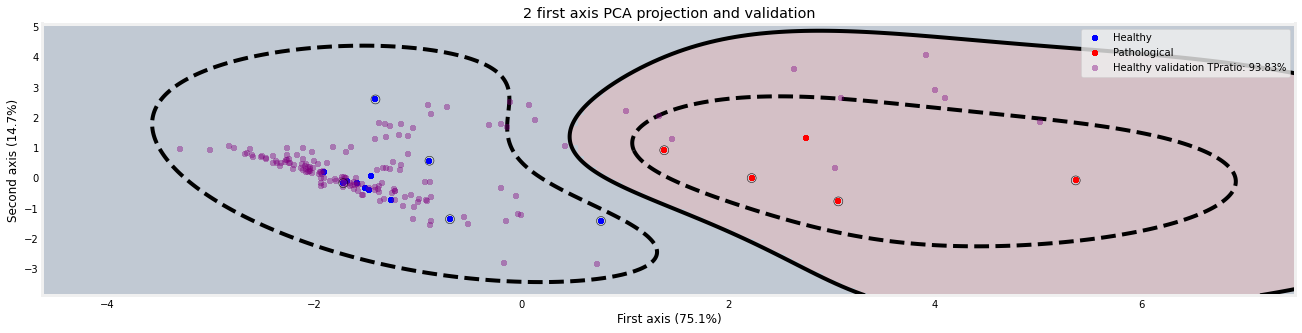

In [17]:
data_copy_2=data_2.drop(["Healthy","Origin","FibrosisUnderBowman"],axis=1)
print(data_copy_2.shape,len(pca.components_[0]))
data_copy_2=(data_copy_2-np.mean(data.drop(["Healthy","Origin","FibrosisUnderBowman"],axis=1),0))/np.std(data.drop(["Healthy","Origin","FibrosisUnderBowman"],axis=1),0)

X_2=np.sum(data_copy_2*pca.components_[0],axis=1)
Y_2=np.sum(data_copy_2*pca.components_[1],axis=1)
Z_2=np.array([X_2.to_numpy().T,Y_2.to_numpy().T]).T

class_z=np.ones((len(Z_2),1))
y_predict_2=clf.predict(Z_2)
print("Ratio of true positive: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)))
print("Miss classified:"+str(len(y_predict_2)-np.sum(y_predict_2)))
for i,y in enumerate(y_predict_2):
    if y==0:
        print("Missclassify:",data_2["Origin"][i])
        

X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T

x_min = np.min([ Z[:, 0].min()-1*np.std(Z[:, 0]), Z_2[:, 0].min()-1*np.std(Z_2[:, 0])])
x_max = np.max([ Z[:, 0].max()+1*np.std(Z[:, 0]), Z_2[:, 0].max()+1*np.std(Z_2[:, 0])])
y_min = np.min([ Z[:, 1].min()-1*np.std(Z[:, 1]), Z_2[:, 1].min()-1*np.std(Z_2[:, 1])])
y_max = np.max([ Z[:, 1].max()+1*np.std(Z[:, 1]), Z_2[:, 1].max()+1*np.std(Z_2[:, 1])])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.figure(figsize=(20,5))
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)
plt.scatter(X_2,Y_2,c="purple",marker="+",label="Healthy validation TPratio: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)),zorder=10,alpha=0.4)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)

plt.title("2 first axis PCA projection and validation")
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()

In [18]:
ind=np.where(X_2>8)[0]
data_2.T[ind]

""
PeakWidth
Sigma
DataCov
Mean
MSE
AreaRatio
FibrosisUnderBowman
Healthy
Origin


In [19]:
np.mean(data_2,0)

PeakWidth              1.213225
Sigma                  0.214379
DataCov                0.002424
Mean                   0.507717
MSE                    0.037721
AreaRatio              0.006299
FibrosisUnderBowman    0.395062
Healthy                1.000000
dtype: float64

# Fuchs

In [20]:
repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_2')
# repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_renammed')
healthy_value=2 #fushs

data_fuchs=create_new_dataset(repertory_fuchs,healthy_value)


Error with: BRIMIC_OD_9_PachyWide.jpg image #53
Error with: CLAMAR_OD_0_Line.jpg image #58
Error with: GALHEL_OS_0_Line.jpg image #98
Error with: GALHEL_OS_1_PachyWide.jpg image #102
Error with: GOMPAS_OD_0_Pachy.jpg image #125
Error with: GUIMIC_OD_1_Line.jpg image #134
Error with: HADBER_OS_0_Line.jpg image #146
Error with: LE BER_OD_3_Pachy.jpg image #181
Error with: LE MAD_OD_12_Pachy.jpg image #183
Error with: MARCLA_OD_0_CorneaLine.jpg image #203
Error with: OTTCLA_OD_0_Line.jpg image #235
Error with: SELNIC_OD_0_PachyWide.jpg image #262
Error with: STECHA_OS_0_Line.jpg image #279
Error with: VANLUD_OD_0_Pachy.jpg image #306
Error with: VANMAR_OD_12_Line.jpg image #312
304 / 316  files succesfully quantified


In [21]:
# data_fuchs_detail=pd.read_pickle(os.path.join(repertory_fuchs,"data_renamed.pkl"))
len(data_fuchs)

month=np.ones(len(data_fuchs))*np.nan
for i in range(len(data_fuchs)):
    origin=data_fuchs["Origin"][i]
    origin_split=origin.split("_")
    month[i]=int(origin_split[2])
data_fuchs=data_fuchs.assign(Month=month)
data_fuchs.to_pickle("./Dataset/data_set_fuchs_2.pkl")

In [22]:
# data_fuchs_detailed=data_fuchs.copy()
# data_fuchs_detailed.insert(len(data_fuchs_detailed.T),"month",0)
# data_fuchs_detailed.insert(len(data_fuchs_detailed.T),"type","")
# for i in range(len(data_fuchs_detailed)):
#     index=np.where(data_fuchs_detail==data_fuchs["Origin"][i])[0]
#     data_fuchs_detailed["month"][i]=data_fuchs_detail["Month"][index]
#     data_fuchs_detailed["type"][i]=data_fuchs_detail["type"][index]

In [23]:
data_fuchs.head()

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,FibrosisUnderBowman,Healthy,Origin,Month
0,2.769444,0.147228,0.000120,0.305218,0.193319,-0.002694,True,2,BARVER_OD_0_Line,0.0
1,3.000231,0.141357,0.000185,0.346134,0.182483,-0.001856,True,2,BARVER_OD_0_Pachy,0.0
2,2.769444,0.640778,0.004447,1.272999,0.127240,0.056221,False,2,BARVER_OD_12_Line,12.0
3,1.384722,0.260465,0.000989,0.767539,0.011497,0.012825,False,2,BARVER_OD_12_Pachy,12.0
4,2.307870,0.522643,0.003247,1.038623,0.061781,0.023608,False,2,BARVER_OD_1_Line,1.0


In [24]:
list_parameters=["PeakWidth","Sigma","DataCov","Mean","MSE","AreaRatio","Healthy","Origin"]
total_data=[data_2[list_parameters],data_fuchs[list_parameters+["Month"]]]
total_data=pd.concat(total_data)
print(len(total_data))

466


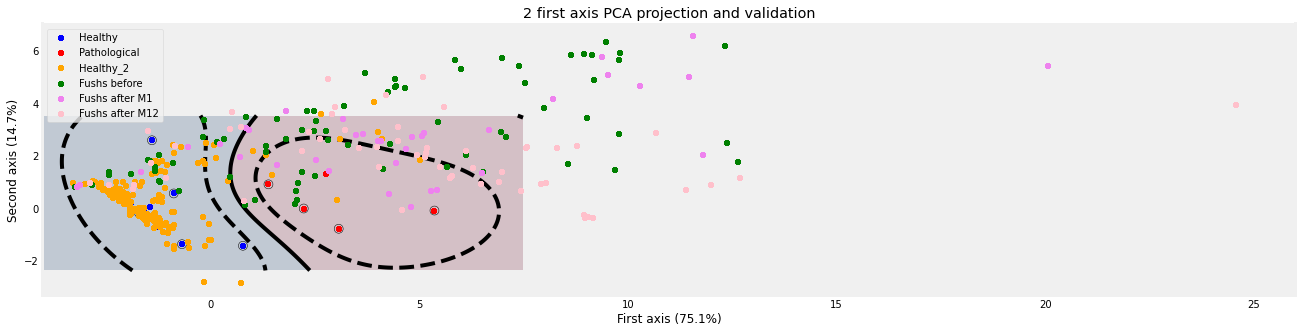

In [25]:
plt.figure(figsize=(20,5))
#Learning data
data_copy=data.drop(["Healthy","Origin","FibrosisUnderBowman"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)

## Data extraction and projection
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T
## Prediction
class_z=np.ones((len(Z),1))
y_predict=clf.predict(Z)

# Other data

total_data_copy=total_data[list_parameters[:-2]]
total_data_copy=(total_data_copy-np.mean(data.drop(["Healthy","Origin","FibrosisUnderBowman"],axis=1),0))/np.std(data.drop(["Healthy","Origin","FibrosisUnderBowman"],axis=1),0)

## Data extraction and projection
X_other=np.sum(total_data_copy*pca.components_[0],axis=1)
Y_other=np.sum(total_data_copy*pca.components_[1],axis=1)
Z_other=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C_other=np.array([data["Healthy"].to_numpy()]).T
## Prediction
class_z_other=np.ones((len(Z_other),1))
y_predict_other=clf.predict(Z_other)


## SVM Plot
x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
y_max = Z[:, 1].max()+1*np.std(Z[:, 1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
ZZ = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
ZZ = ZZ.reshape(XX.shape)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, ZZ > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,ZZ,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)


## Data plot
### Learning dataset
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)
# plt.scatter(X,Y,c="orange",marker="+",label="Healthy validation TPratio: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)),zorder=10)
bool_pre_op=(total_data["Month"]==0)*(total_data["Healthy"]==2)
bool_post_op_M1=(total_data["Month"]==1)*(total_data["Healthy"]==2)
bool_post_op_M3=(total_data["Month"]==3)*(total_data["Healthy"]==2)
bool_post_op_M6=(total_data["Month"]==6)*(total_data["Healthy"]==2)
bool_post_op_M12=(total_data["Month"]==12)*(total_data["Healthy"]==2)
plt.scatter(X_other[total_data["Healthy"]==1],Y_other[total_data["Healthy"]==1],c="orange",marker="+",label="Healthy_2",zorder=10)
plt.scatter(X_other[bool_pre_op],Y_other[bool_pre_op],c="green",marker="+",label="Fushs before",zorder=10)
plt.scatter(X_other[bool_post_op_M1],Y_other[bool_post_op_M1],c="violet",marker="+",label="Fushs after M1",zorder=10)
plt.scatter(X_other[bool_post_op_M12],Y_other[bool_post_op_M12],c="pink",marker="+",label="Fushs after M12",zorder=10)

plt.title("2 first axis PCA projection and validation")
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()